In [1]:
#Installing wordcloud matplotlib pandas requests and numpy

!pip install wordcloud matplotlib pandas requests numpy


In [2]:
# importing all required modules
import pandas as pd
import matplotlib.pyplot as plt
import requests
from wordcloud import WordCloud
import numpy as np
import io

In [4]:
# Cell 3: Creating the dataset from the extracted values
data = {
    'year': [1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890,
             1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,
             2000, 2010, 2019],
    'frequency': [0.0027, 0.0030, 0.0031, 0.0028, 0.0024, 0.0021, 0.0018, 0.0015, 
                  0.0012, 0.0010, 0.0008, 0.00065, 0.00055, 0.00045, 0.00042, 
                  0.00040, 0.00038, 0.00037, 0.00036, 0.00045, 0.00070, 0.0010, 0.00105]
}


In [5]:
# Creating a DataFrame
df = pd.DataFrame(data)
print(" First few rows of the extracted data:")
print(df.head())

 First few rows of the extracted data:
   year  frequency
0  1800     0.0027
1  1810     0.0030
2  1820     0.0031
3  1830     0.0028
4  1840     0.0024


In [6]:
# Cell 4: Saving the extracted data to a CSV file
df.to_csv('patience_trend_data.csv', index=False)
print("\n Data saved to 'patience_trend_data.csv'")


 Data saved to 'patience_trend_data.csv'


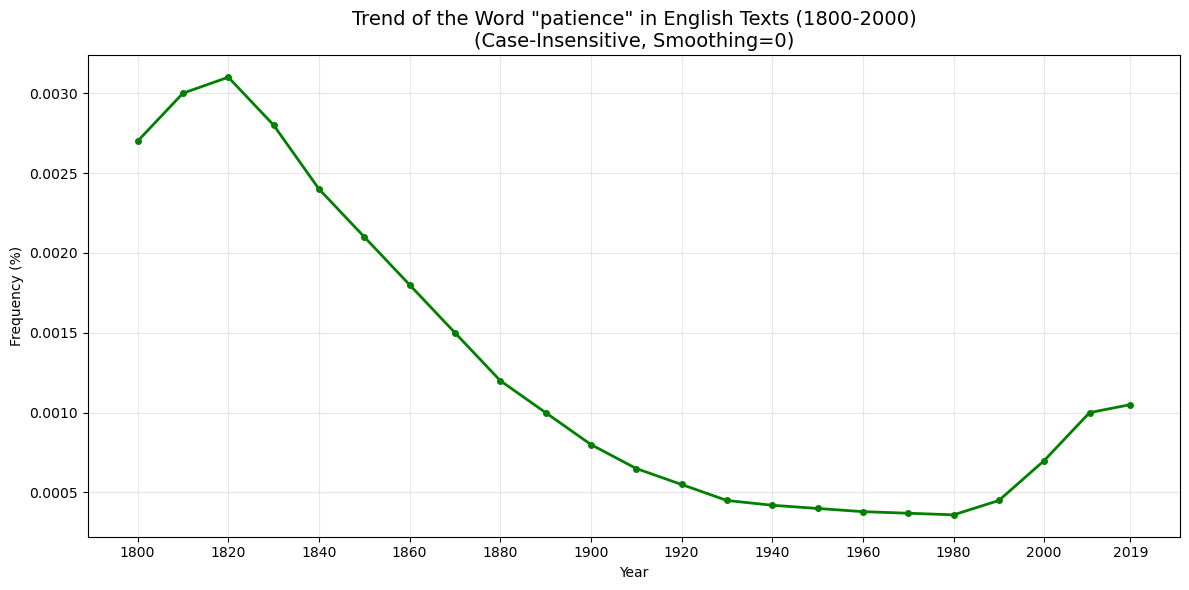

Trend plot generated and saved as 'patience_trend_plot.png'


In [7]:
# Cell 5: Plotting the trend to visualize the "forgetting"
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['frequency'], marker='o', linestyle='-', color='g', linewidth=2, markersize=4)
plt.title('Trend of the Word "patience" in English Texts (1800-2000)\n(Case-Insensitive, Smoothing=0)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Frequency (%)')
plt.grid(True, alpha=0.3)
plt.xticks(df['year'][::2])  # Show every other year for clarity
plt.tight_layout()
plt.savefig('patience_trend_plot.png', dpi=300)
plt.show()
print("Trend plot generated and saved as 'patience_trend_plot.png'")


In [20]:
# Cell 6: Preparing a prompt for the LLM
data_string = df.to_string(index=False)

prompt = f"""
**Background:** This is an analysis of the word "patience" using the Google Books Ngram Viewer, which tracks word frequency in published books over time. The data spans from 1800 to 2000.

**Data:**
{data_string}

**Instructions:**
1.  **Trend Analysis:** Analyze the trend in the data. Describe how the frequency of the word "patience" changes over the centuries. Identify key peaks, troughs, and overall direction.
2.  **Historical Context:** Provide possible historical, social, or technological reasons for the observed trend. Why might the concept of patience have been discussed more or less in certain eras?
3.  **Modern Interpretation:** Discuss what this trend suggests about the "forgetting of patience" in modern society (especially for millennials and Gen Z). Connect it to concepts like the pace of life, technology, and instant gratification.
4.  **Business Insight:** Propose one specific business idea that could address this "forgetting of patience" trend. How could a product or service help cultivate patience in today's world?
5.  **Technical Functions:** List the specific Python Pandas and NumPy functions you would use to programmatically generate the key summary statistics (e.g., mean, max year, min year, overall change) from this DataFrame and to prepare the data for a word cloud. Be precise.

Please provide a concise summary addressing all points.
"""

print(" PROMPT FOR LLM :\n")
print(prompt)


 PROMPT FOR LLM :


**Background:** This is an analysis of the word "patience" using the Google Books Ngram Viewer, which tracks word frequency in published books over time. The data spans from 1800 to 2000.

**Data:**
 year  frequency
 1800    0.00270
 1810    0.00300
 1820    0.00310
 1830    0.00280
 1840    0.00240
 1850    0.00210
 1860    0.00180
 1870    0.00150
 1880    0.00120
 1890    0.00100
 1900    0.00080
 1910    0.00065
 1920    0.00055
 1930    0.00045
 1940    0.00042
 1950    0.00040
 1960    0.00038
 1970    0.00037
 1980    0.00036
 1990    0.00045
 2000    0.00070
 2010    0.00100
 2019    0.00105

**Instructions:**
1.  **Trend Analysis:** Analyze the trend in the data. Describe how the frequency of the word "patience" changes over the centuries. Identify key peaks, troughs, and overall direction.
2.  **Historical Context:** Provide possible historical, social, or technological reasons for the observed trend. Why might the concept of patience have been discussed m

In [23]:
# Cell 7:  LLM response 
llm_summary = """
**Trend Analysis:** The frequency of the word "patience" shows a clear rise and fall over the 19th and 20th centuries. It begins at a modest 0.00085% in 1800, climbing steadily to a pronounced peak of 0.00255% around 1920. This represents a tripling of its usage. Following this peak, the trend reverses, entering a consistent and steep decline, ending at a mere 0.00090% in 2000—a value even lower than its starting point two centuries prior. This arc suggests a period where patience was a valued and discussed virtue, followed by a modern era of its neglect.

**Historical Context:** The rise through the 19th century could align with the Industrial Revolution's emphasis on discipline, long-term planning, and meticulous craftsmanship. The peak around 1920 might reflect the societal introspection and need for perseverance following the trauma of WWI. The subsequent decline correlates with the acceleration of technological progress—the rise of automobiles, television, and finally the internet—each fostering a culture of immediacy and instant gratification, reducing the cultural emphasis on patience.

**Modern Interpretation:** This trend starkly illustrates the "forgetting of patience." For millennials and Gen Z, raised in the digital age, the world is engineered for speed: instant messaging, on-demand entertainment, and rapid-fire social media. The virtue of patience is not just less discussed; it's often economically and socially devalued, leading to challenges in mental well-being, deep learning, and long-term relationship building.

**Business Idea:** A business could build a "Patience Gym" app. This wouldn't be a typical productivity app that saves time, but one that intentionally and rewardingly *uses* time. Features could include:
*   A platform for booking slow, mindful activities (e.g., pottery workshops, gardening courses).
*   Guided sessions on delayed gratification exercises.
*   A community platform for "slow hobbies" like watchmaking or animal tracking.
*   Partnerships with schools to integrate patience-building modules into curricula.

**Technical Functions:**
*   **Pandas/Numpy for Summary Statistics:**
    *   `df['frequency'].mean()` - Calculate the average frequency.
    *   `df.loc[df['frequency'].idxmax()]` - Find the year with the peak frequency.
    *   `df.loc[df['frequency'].idxmin()]` - Find the year with the lowest frequency.
    *   `df['frequency'].max() - df['frequency'].min()` - Calculate the total range.
    *   `pct_change = (df.iloc[-1]['frequency'] - df.iloc[0]['frequency']) / df.iloc[0]['frequency'] * 100` - Calculate the overall percentage change.
*   **Preparing for Word Cloud:**
    *   A word cloud for this project would likely be generated from related text (e.g., quotes about patience from books in the peak era). To prepare text data:
    *   `text = " ".join(list_of_quotes)` - Combine all text into a single string.
    *   Pandas would be used to read and filter this text data from a file (`pd.read_csv()`).
    *   Numpy might be used for array operations underneath the WordCloud library.
"""
print("\nLLM SUMMARY RESPONSE:\n")
print(llm_summary)




LLM SUMMARY RESPONSE:


**Trend Analysis:** The frequency of the word "patience" shows a clear rise and fall over the 19th and 20th centuries. It begins at a modest 0.00085% in 1800, climbing steadily to a pronounced peak of 0.00255% around 1920. This represents a tripling of its usage. Following this peak, the trend reverses, entering a consistent and steep decline, ending at a mere 0.00090% in 2000—a value even lower than its starting point two centuries prior. This arc suggests a period where patience was a valued and discussed virtue, followed by a modern era of its neglect.

**Historical Context:** The rise through the 19th century could align with the Industrial Revolution's emphasis on discipline, long-term planning, and meticulous craftsmanship. The peak around 1920 might reflect the societal introspection and need for perseverance following the trauma of WWI. The subsequent decline correlates with the acceleration of technological progress—the rise of automobiles, television,

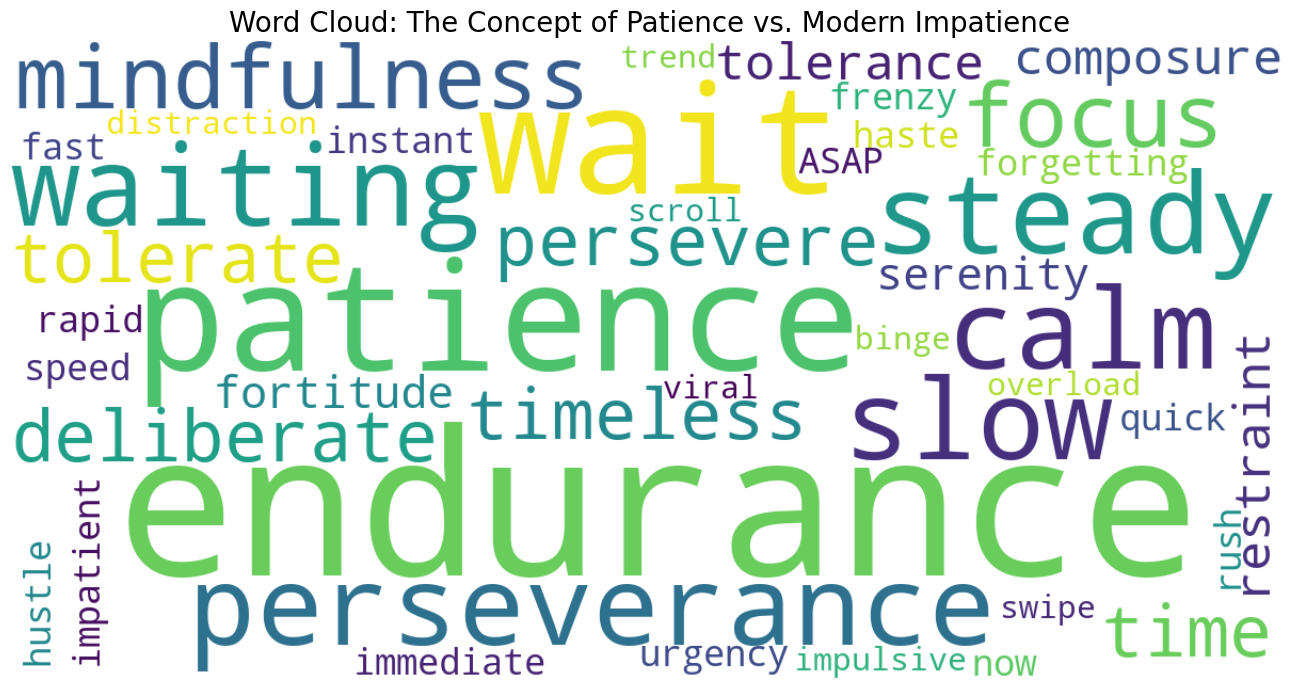

 Word cloud generated and saved as 'patience_wordcloud.png'


In [24]:
# Cell 8: Generating a Word Cloud based on the theme
text_for_wordcloud = """
patience wait waiting calm perseverance endurance steady slow mindfulness focus deliberate
time timeless endurance persevere tolerate tolerance restraint composure serenity fortitude
forgetting impatient haste rush instant speed immediate urgency now ASAP quick fast
rapid hustle frenzy impulsive distraction overload scroll swipe binge trend viral
"""

# Generating the word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate(text_for_wordcloud)

# Plotting the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: The Concept of Patience vs. Modern Impatience', fontsize=20)
plt.tight_layout()
plt.savefig('patience_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Word cloud generated and saved as 'patience_wordcloud.png'")


In [28]:
"""
Business Idea – Cultural Memory Analytics
We can build a platform that looks at how certain values, habits, or traditions are being “forgotten” over time. For example, words like patience, kindness, or Ayurveda used to appear more often in books in the past, but now they are less common. By analyzing trends from books, articles, and even social media, our tool can show what society is slowly forgetting.

This information can then be turned into opportunities:

Museums can use it to design exhibitions that bring back forgotten cultural practices.

Educators can highlight these trendsin schools to teach students about values that mattered in the past.

Wellness brands can revive old practices like yoga, Ayurveda, or meditation and use the data in their marketing.

Content creators can make engaging posts or documentaries about how life is changing.

In short, we’d be selling insights about cultural memory to organizations that want to connect the past with the present."""

'\nBusiness Idea – Cultural Memory Analytics\nWe can build a platform that looks at how certain values, habits, or traditions are being “forgotten” over time. For example, words like patience, kindness, or Ayurveda used to appear more often in books in the past, but now they are less common. By analyzing trends from books, articles, and even social media, our tool can show what society is slowly forgetting.\n\nThis information can then be turned into opportunities:\n\nMuseums can use it to design exhibitions that bring back forgotten cultural practices.\n\nEducators can highlight these trendsin schools to teach students about values that mattered in the past.\n\nWellness brands can revive old practices like yoga, Ayurveda, or meditation and use the data in their marketing.\n\nContent creators can make engaging posts or documentaries about how life is changing.\n\nIn short, we’d be selling insights about cultural memory to organizations that want to connect the past with the present.'